In [185]:
import pandas as pd
from sklearn import preprocessing, decomposition
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('adultIncome.csv')

In [12]:
df_cont = df[['age','hours per week']]
df_disc = df[['wc', 'education', 'marital status', 'race', 'gender','IncomeClass']]

In [20]:
enc = preprocessing.OrdinalEncoder()
enc.fit(df_disc)
encoded_df = enc.transform(df_disc)

In [192]:
df_all = df_cont.join(pd.DataFrame(encoded_df,columns=['wc', 'education', 'marital status', 'race', 'gender','IncomeClass']))

In [45]:
scaler =  preprocessing.StandardScaler()
sg = scaler.fit_transform(df_all)

In [188]:
pca = decomposition.PCA()
pca.fit(sg)
pca.explained_variance_ratio_

array([0.25710117, 0.14263295, 0.12349046, 0.12233231, 0.10935771,
       0.10033988, 0.08419328, 0.06055224])

In [53]:
pca = decomposition.PCA(n_components=6)
pca.fit(sg)
data_pca = pca.transform(sg)

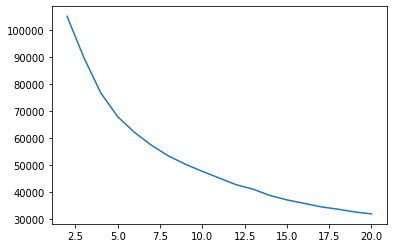

In [187]:
wcss = []
for i in range(2,21):
    kmeans_pca = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans_pca.fit(data_pca)
    wcss.append(kmeans_pca.inertia_)

plt.plot(range(2,21),wcss)

In [69]:
kmeans_pca = KMeans(n_clusters=4, init = 'k-means++', random_state=42)
kmeans_pca.fit(data_pca)

In [193]:
results = pd.Series(kmeans_pca.labels_,name='cluster').apply(str)
df_all = df_all.join(results)

In [117]:
def noisify(x):
    if type(x) == str:
        return x
    else:
        return x + np.random.randn()*0.1

In [122]:
df_noise = df_all.sample(200).applymap(noisify)

In [105]:
enc.categories_

[array([' Federal-gov', ' Local-gov', ' Never-worked', ' Private'],
       dtype=object),
 array([' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool',
        ' Prof-school', ' Some-college'], dtype=object),
 array([' Divorced', ' Never-married', ' Widowed', 'Married'], dtype=object),
 array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
        ' White'], dtype=object),
 array([' Female', ' Male'], dtype=object),
 array([' <=50K', ' >50K'], dtype=object)]

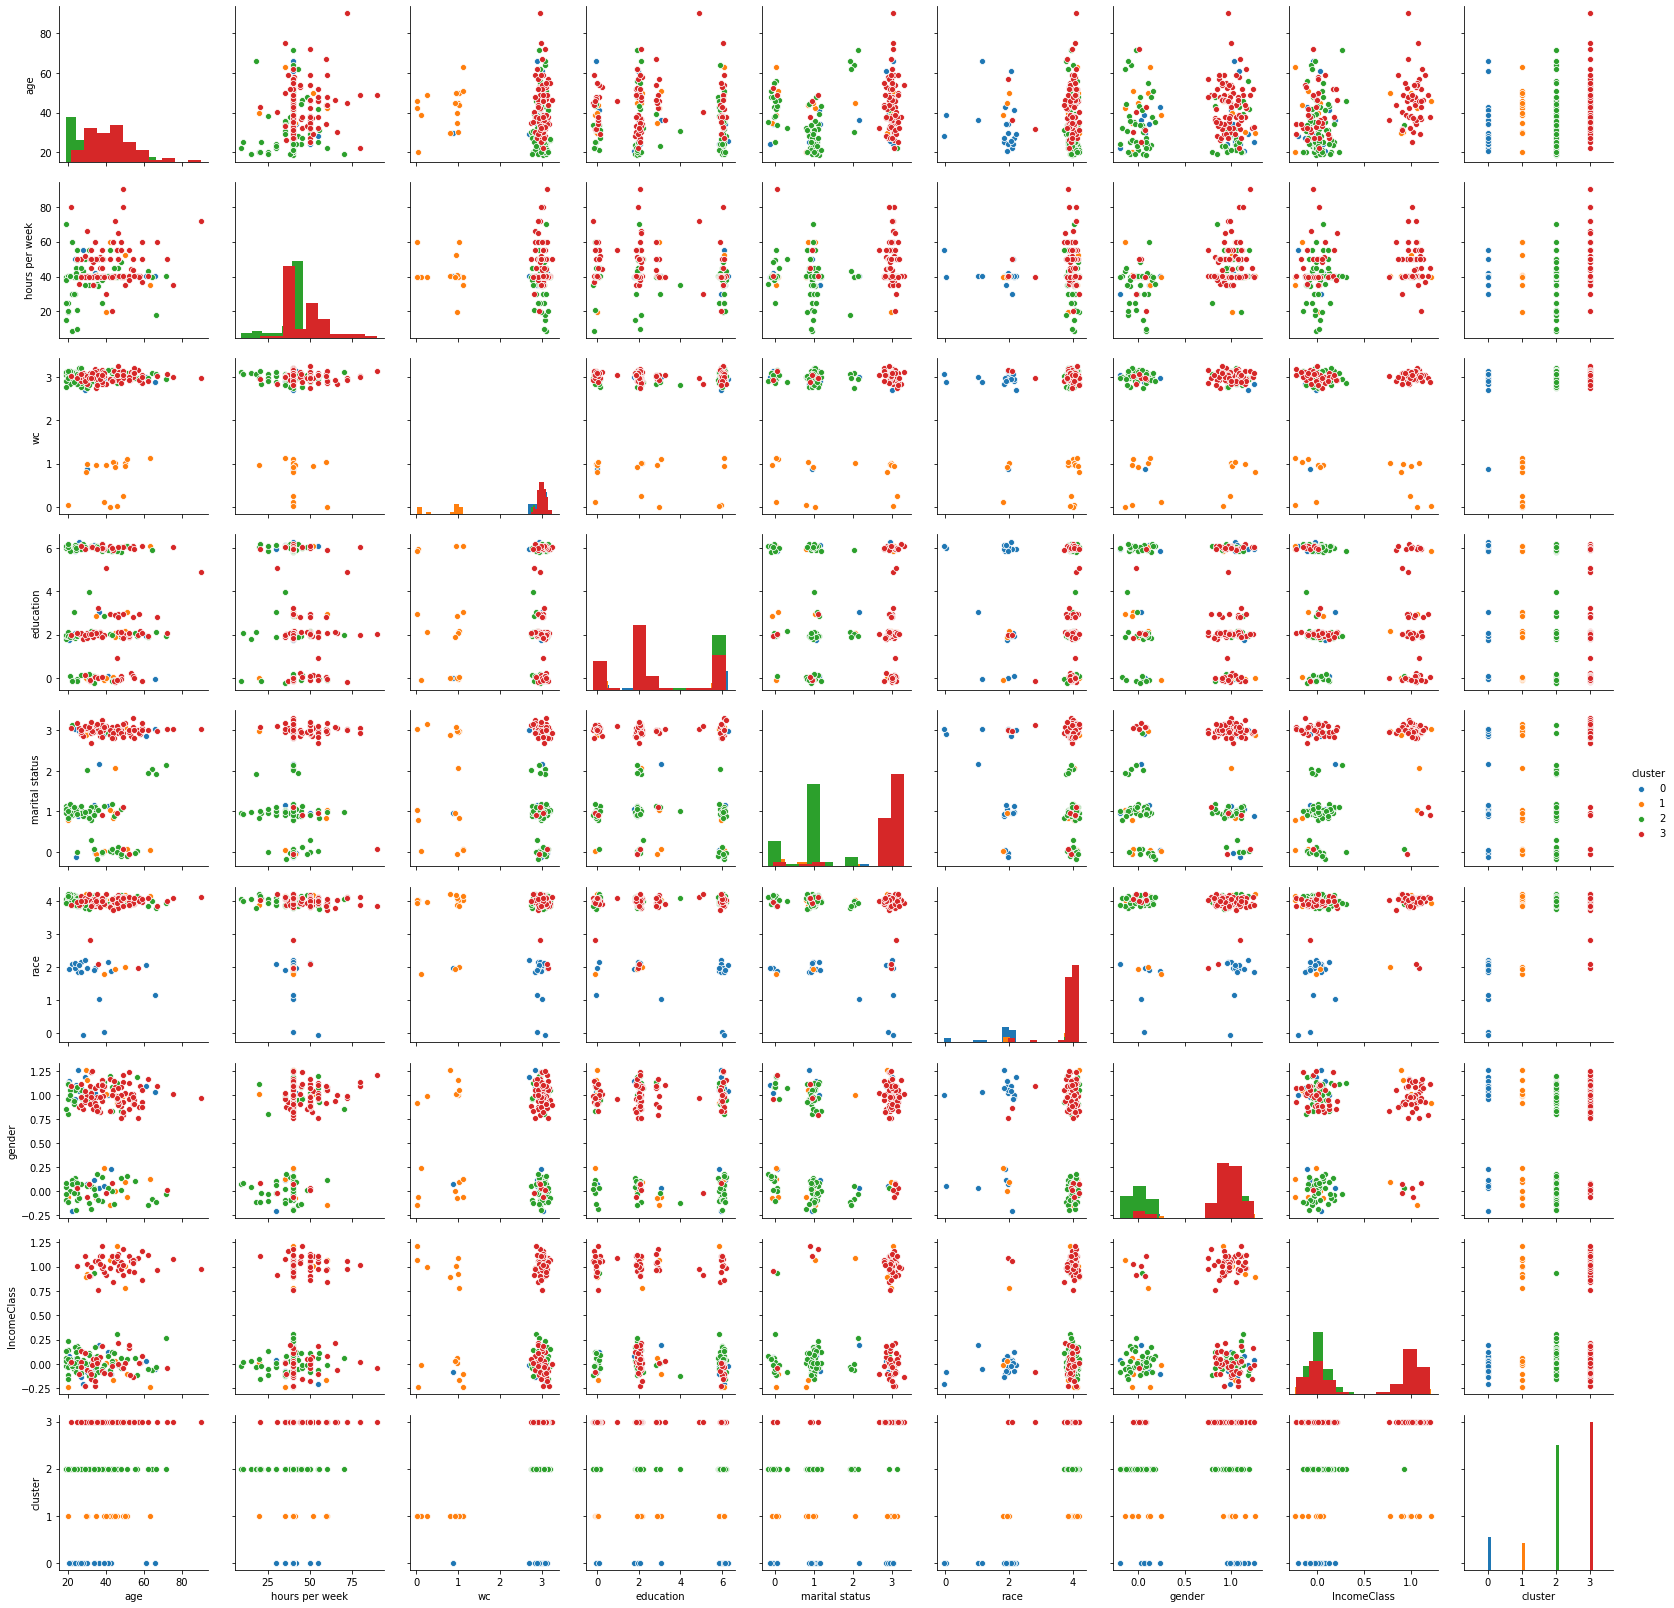

In [145]:
sns.pairplot(df_noise,hue='cluster',diag_kind='hist')

In [131]:
df_pca_data = pd.DataFrame(data_pca).join(results)

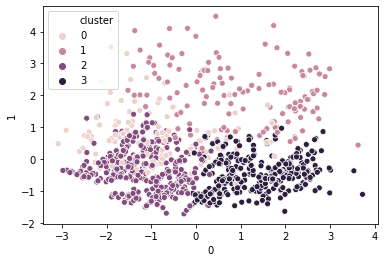

In [139]:
sns.scatterplot(x=0, y=1, data=df_pca_data.sample(1000), hue='cluster')

In [161]:
df_even_gender = df_all[df_all.gender == 1].sample(100).append(df_all[df_all.gender == 0].sample(100))

In [179]:
df_all.gender.value_counts()

1.0    13100
0.0     6687
Name: gender, dtype: int64

In [177]:
df_even_gender[df_even_gender.gender == 0]['marital status'].value_counts()

1.0    44
0.0    26
3.0    23
2.0     7
Name: marital status, dtype: int64

In [176]:
df_even_gender[df_even_gender.gender == 1]['marital status'].value_counts()

3.0    57
1.0    32
0.0    11
Name: marital status, dtype: int64

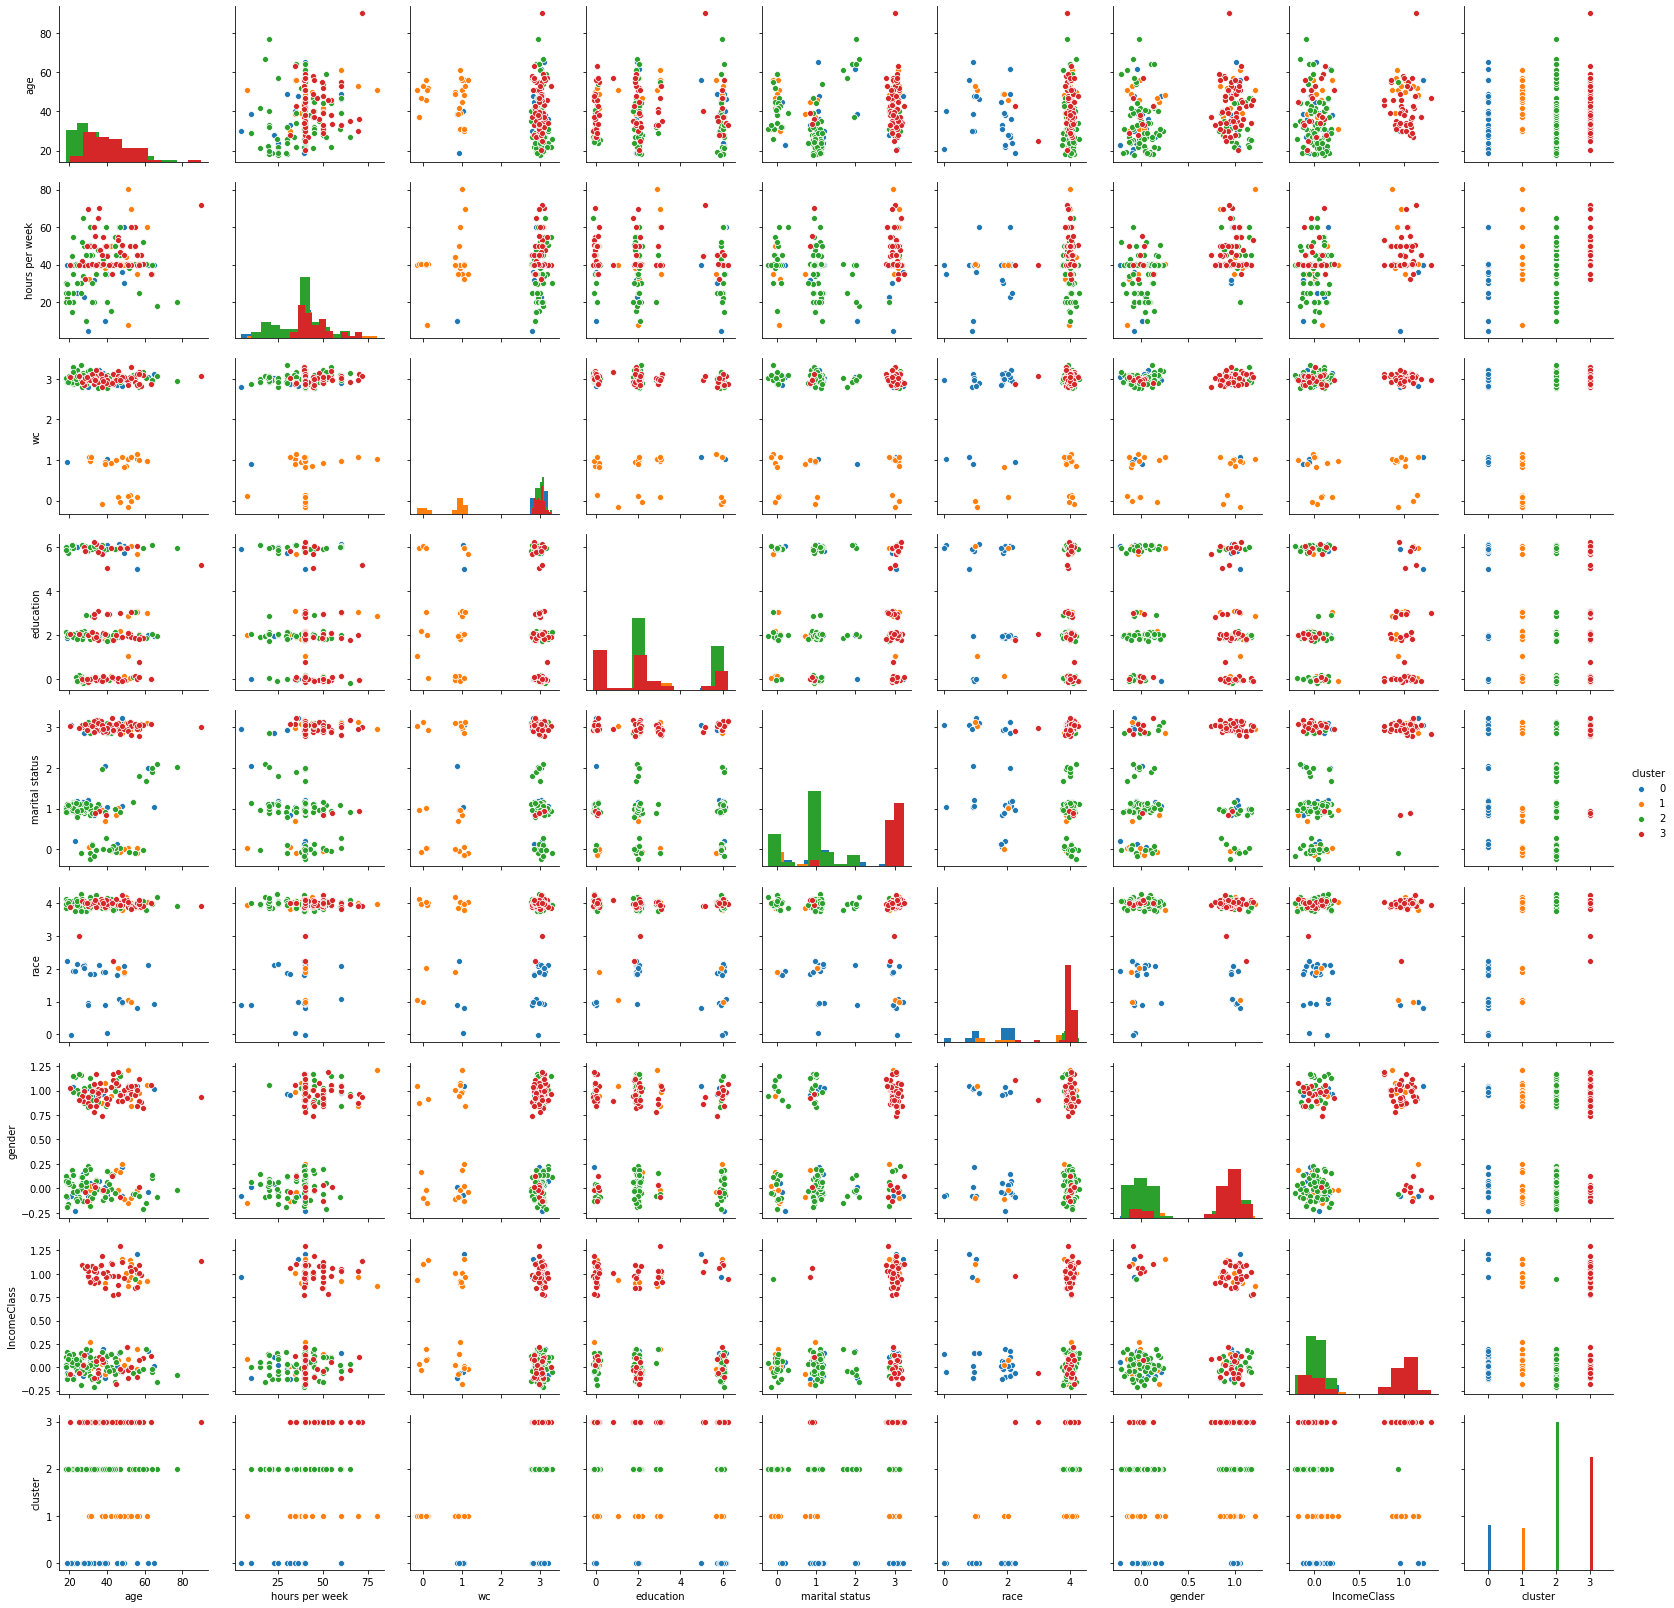

In [160]:
sns.pairplot(df_even_gender,hue='cluster',diag_kind='hist')